In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
? pd.read_excel

In [12]:
xl = pd.ExcelFile('response_L8_OLI.xlsx')
df = pd.read_excel(xl,'Blue')
pro_min = 400; pro_max = 2500
df.head()

,Wavelength,BA RSR [watts],stdev(RSR)
0,436,0.000010,0.000006
1,437,0.000061,0.000239
2,438,0.000117,0.000255
3,439,0.000241,0.000248
4,440,0.000349,0.000243


In [4]:
bands = ['CoastalAerosol', 'Blue', 'Green', 'Red', 'NIR', 'Cirrus', 'SWIR1', 'SWIR2', 'Pan']
L8response = np.zeros((len(bands), 2101))
pro_min = 400; pro_max = 2500
for i,band in enumerate(bands):
    df = pd.read_excel(xl,band)
    band_min = min( df['Wavelength'] )
    band_max = max( df['Wavelength'] )
    length = band_max - band_min + 1
    leftzeroes = band_min - pro_min
    rightzeroes = pro_max - band_max
    L8response[i,:] = np.concatenate( ( np.zeros((1,leftzeroes)), np.array(df['BA RSR [watts]']).reshape(1,length), np.zeros((1,rightzeroes)) ), axis = 1 )
    

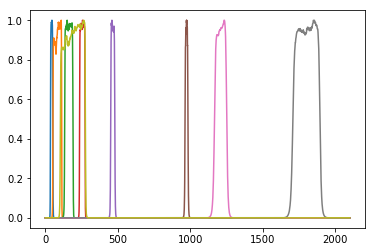

In [7]:
for i in range(len(bands)):
    plt.plot(L8response[i,:])

In [8]:
L8OLIresponse = {'responsemat':L8response, 'bands' : bands}

In [10]:
import pickle

In [11]:
with open('L8response.pkl','wb') as handle:
    pickle.dump(L8OLIresponse, handle, protocol=pickle.HIGHEST_PROTOCOL)